**잠깐!**

이번엔 모델 학습을 아주 많이 수행해야 해서 시간이 오래 걸릴 수 있어요.

Colab에선 GPU를 사용해서 더 빠르게 학습할 수 있습니다.

GPU를 연결하는 방법은 상단의 **'런타임 - 런타임 유형 변경 - T4 GPU - 저장'**을 선택하면 됩니다!

이번엔 모델 구조를 개선하여 성능을 올려봅시다

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

우선 항상 같은 결과를 보장하기 위해 랜덤 시드를 고정하겠습니다.

In [2]:
# 공정한 비교를 위한 랜덤 시드 고정

import random
import numpy as np

seed = 14

np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [3]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train= x_train / 255.0  # 0~255 값을 0~1로 정규화
x_test = x_test / 255.0

# 레이블을 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


우선 이전에 썼던 기본 모델의 성능부터 확인하겠습니다!

92.38%가 나왔습니다. 그럼 이제 모델 구조를 바꿔보면서 실험해 볼까요?

## 1. 레이어 차원 수

현재 모델은 784x128 차원의 Dense layer 하나와 10개의 출력값을 내는 128x10 차원의 Dense layer 2개로 구성되어 있습니다. 이 레이어의 차원 수(128)를 바꿔 보면 어떨까요?

64, 256, 512로 바꿔서 각각 실험해 보겠습니다.

In [ ]:
def create_dim_model(dim):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # 28x28 이미지를 1차원 벡터로 변환
        layers.Dense(dim, activation='relu'),  # 128 뉴런의 완전 연결층
        layers.Dense(10, activation='softmax') # 10개의 출력 클래스 (0~9 숫자)
    ])

    # 모델 컴파일
    model.compile(optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model64 = create_dim_model(64)
model128 = create_dim_model(128)
model256 = create_dim_model(256)
model512 = create_dim_model(512)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model64.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6160 - loss: 1.4003 - val_accuracy: 0.8726 - val_loss: 0.4903
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8785 - loss: 0.4687 - val_accuracy: 0.9013 - val_loss: 0.3711
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8982 - loss: 0.3748 - val_accuracy: 0.9108 - val_loss: 0.3268
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9082 - loss: 0.3340 - val_accuracy: 0.9156 - val_loss: 0.3011
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9152 - loss: 0.3084 - val_accuracy: 0.9216 - val_loss: 0.2829


In [ ]:
model128.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6401 - loss: 1.3460 - val_accuracy: 0.8805 - val_loss: 0.4660
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8817 - loss: 0.4511 - val_accuracy: 0.9011 - val_loss: 0.3610
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8997 - loss: 0.3663 - val_accuracy: 0.9113 - val_loss: 0.3200
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9087 - loss: 0.3273 - val_accuracy: 0.9187 - val_loss: 0.2953
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9157 - loss: 0.3021 - val_accuracy: 0.9226 - val_loss: 0.2772


In [ ]:
model256.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6811 - loss: 1.2671 - val_accuracy: 0.8862 - val_loss: 0.4445
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8862 - loss: 0.4329 - val_accuracy: 0.9058 - val_loss: 0.3480
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9022 - loss: 0.3541 - val_accuracy: 0.9148 - val_loss: 0.3088
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9122 - loss: 0.3169 - val_accuracy: 0.9203 - val_loss: 0.2848
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9201 - loss: 0.2925 - val_accuracy: 0.9260 - val_loss: 0.2673


In [ ]:
model512.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6828 - loss: 1.2692 - val_accuracy: 0.8864 - val_loss: 0.4421
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8882 - loss: 0.4291 - val_accuracy: 0.9056 - val_loss: 0.3473
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9045 - loss: 0.3512 - val_accuracy: 0.9158 - val_loss: 0.3083
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9137 - loss: 0.3140 - val_accuracy: 0.9212 - val_loss: 0.2840
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9207 - loss: 0.2891 - val_accuracy: 0.9256 - val_loss: 0.2661


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9071 - loss: 0.3261
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9113 - loss: 0.3177
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9148 - loss: 0.3098
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.3058


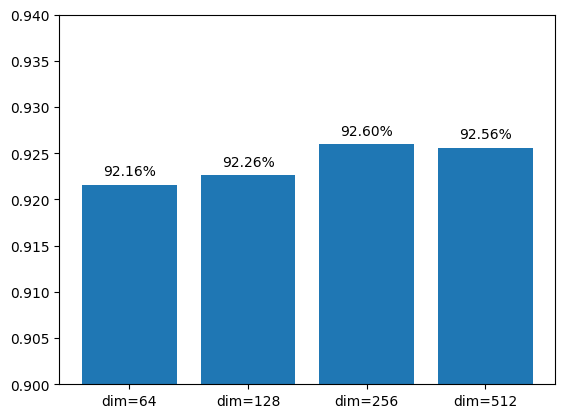

In [ ]:
labels = ["dim=64", "dim=128", "dim=256", "dim=512"]
acc_values = [model.evaluate(x_test, y_test)[1] for model in [model64, model128, model256, model512]]

# 막대 그래프 그리기
plt.bar(range(4), acc_values)

# X축 레이블 설정
plt.xticks(range(4), labels)

# Y축 범위 설정
plt.ylim(0.9, 0.94)

# 막대 상단에 값 표시
for i, v in enumerate(acc_values):
    plt.text(i, v + 0.001, f"{v*100:.2f}%", ha="center", fontsize=10)

plt.show()

256 > 512 > 128 > 64 순으로 나왔습니다.

즉, 레이어의 차원 수는 클수록 좋기는 하지만, 너무 커져도 좋지 않습니다.

입력 차원 수에 맞춰서 '적당한' 수치를 찾는 것이 좋습니다.

적당한 차원 수를 찾는 방법은 지금 한 것과 같이 다양한 값을 직접 실험해 보는 것이 제일 좋습니다.

## 2. 레이어 깊이

현재는 2개의 Dense layer를 사용하고 있습니다. 레이어의 수를 늘리면 어떨까요?

In [ ]:
def create_depth_model(dim, depth):
    model_layers = [
        layers.Flatten(input_shape=(28, 28)),  # 28x28 이미지를 1차원 벡터로 변환
    ]
    for i in range(depth):
        model_layers.append(
            layers.Dense(dim, activation='relu')
        )
        dim //= 2

    model_layers.append(
        layers.Dense(10, activation='softmax') # 10개의 출력 클래스 (0~9 숫자)
    )

    model = models.Sequential(model_layers)

    # 모델 컴파일
    model.compile(optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

depth3model = create_depth_model(256, 3)
depth4model = create_depth_model(256, 4)
depth5model = create_depth_model(256, 5)
depth6model = create_depth_model(256, 6)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
depth3model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5913 - loss: 1.4308 - val_accuracy: 0.8900 - val_loss: 0.3812
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9002 - loss: 0.3541 - val_accuracy: 0.9156 - val_loss: 0.2907
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9201 - loss: 0.2789 - val_accuracy: 0.9267 - val_loss: 0.2495
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9326 - loss: 0.2383 - val_accuracy: 0.9346 - val_loss: 0.2204
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9408 - loss: 0.2094 - val_accuracy: 0.9409 - val_loss: 0.1987


In [ ]:
depth4model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4820 - loss: 1.6530 - val_accuracy: 0.8643 - val_loss: 0.4486
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8959 - loss: 0.3669 - val_accuracy: 0.9159 - val_loss: 0.2945
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9243 - loss: 0.2646 - val_accuracy: 0.9328 - val_loss: 0.2369
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9384 - loss: 0.2149 - val_accuracy: 0.9420 - val_loss: 0.2019
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9481 - loss: 0.1820 - val_accuracy: 0.9480 - val_loss: 0.1793


In [ ]:
depth5model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3338 - loss: 1.9079 - val_accuracy: 0.7907 - val_loss: 0.6642
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8738 - loss: 0.4384 - val_accuracy: 0.8817 - val_loss: 0.4120
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9209 - loss: 0.2765 - val_accuracy: 0.9055 - val_loss: 0.3283
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9386 - loss: 0.2115 - val_accuracy: 0.9198 - val_loss: 0.2803
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9495 - loss: 0.1724 - val_accuracy: 0.9272 - val_loss: 0.2475


In [ ]:
depth6model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2643 - loss: 2.0502 - val_accuracy: 0.7422 - val_loss: 0.8013
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8331 - loss: 0.5758 - val_accuracy: 0.8507 - val_loss: 0.5016
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9105 - loss: 0.3192 - val_accuracy: 0.9112 - val_loss: 0.3159
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9359 - loss: 0.2311 - val_accuracy: 0.9285 - val_loss: 0.2549
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9477 - loss: 0.1853 - val_accuracy: 0.9394 - val_loss: 0.2149


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9148 - loss: 0.3098
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9309 - loss: 0.2315
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9394 - loss: 0.2051
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9212 - loss: 0.2707
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9315 - loss: 0.2502


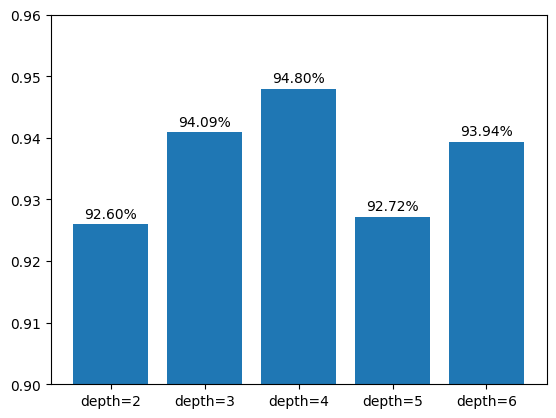

In [ ]:
labels = ["depth=2", "depth=3", "depth=4", "depth=5", "depth=6"]
acc_values = [model.evaluate(x_test, y_test)[1] for model in [model256, depth3model, depth4model, depth5model, depth6model]]

# 막대 그래프 그리기
plt.bar(range(5), acc_values)

# X축 레이블 설정
plt.xticks(range(5), labels)

# Y축 범위 설정
plt.ylim(0.9, 0.96)

# 막대 상단에 값 표시
for i, v in enumerate(acc_values):
    plt.text(i, v + 0.001, f"{v*100:.2f}%", ha="center", fontsize=10)

plt.show()

이번에도 깊이가 늘어날수록 정확도가 향상하는 추세를 보이지만, 또 너무 깊어지면(depth=6) 오히려 성능이 떨어지는 것을 발견할 수 있습니다.

이렇듯 레이어의 깊이 역시 실험을 통해 적정한 깊이를 찾는 것이 좋습니다.

## 3. 레이어 추가

모델의 성능을 높일 수 있는 특정 레이어들을 추가하는 것도 방법입니다.

* Dropout : '학습 중'에 의도적으로 일부 레이어를 꺼서 모델이 특정 패턴을 외우지 않도록 변칙을 줍니다.
  * 모델이 훈련셋에 "과적합"되는 것을 막는데 사용됩니다.
  * 과적합이란? : 모델이 훈련셋에 지나치게 익숙해져 테스트셋에 성능이 약해지는 것을 말합니다.
* LayerNormalization : 모델 레이어의 출력값을 정규화하여 학습을 안정화합니다.

In [ ]:
def add_dropout(dropout_rate=0.1):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])

    # 모델 컴파일
    model.compile(optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

dropoutmodel0 = add_dropout(0.0)
dropoutmodel1 = add_dropout(0.1)
dropoutmodel2 = add_dropout(0.2)
dropoutmodel3 = add_dropout(0.3)
dropoutmodel4 = add_dropout(0.4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Dropout의 효과를 보기 위해선 모델이 과적합 되는 지점까지 학습되어야 합니다.

과적합을 보기 위해 학습 epoch 수를 10으로 늘려보겠습니다.

In [ ]:
dropoutmodel0.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5989 - loss: 1.4268 - val_accuracy: 0.8893 - val_loss: 0.3794
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8986 - loss: 0.3559 - val_accuracy: 0.9174 - val_loss: 0.2840
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9199 - loss: 0.2774 - val_accuracy: 0.9285 - val_loss: 0.2438
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9317 - loss: 0.2363 - val_accuracy: 0.9353 - val_loss: 0.2166
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9405 - loss: 0.2074 - val_accuracy: 0.9416 - val_loss: 0.1966
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9462 - loss: 0.1852 - val_accuracy: 0.9469 - val_loss: 0.1802
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9513 - loss: 0.1674 - val_accuracy: 0.9508 - val_loss: 0.1668
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9557 - loss: 0.1526 - val_accuracy: 0

In [ ]:
dropoutmodel1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5557 - loss: 1.4940 - val_accuracy: 0.8936 - val_loss: 0.3881
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8839 - loss: 0.4008 - val_accuracy: 0.9166 - val_loss: 0.2870
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9106 - loss: 0.3102 - val_accuracy: 0.9297 - val_loss: 0.2429
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9248 - loss: 0.2648 - val_accuracy: 0.9356 - val_loss: 0.2164
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9343 - loss: 0.2312 - val_accuracy: 0.9427 - val_loss: 0.1922
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9402 - loss: 0.2049 - val_accuracy: 0.9472 - val_loss: 0.1761
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9462 - loss: 0.1862 - val_accuracy: 0.9503 - val_loss: 0.1635
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9503 - loss: 0.1712 - val_accuracy: 0

In [ ]:
dropoutmodel2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5576 - loss: 1.4881 - val_accuracy: 0.8948 - val_loss: 0.3872
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8753 - loss: 0.4402 - val_accuracy: 0.9197 - val_loss: 0.2893
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9025 - loss: 0.3437 - val_accuracy: 0.9303 - val_loss: 0.2481
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9159 - loss: 0.2903 - val_accuracy: 0.9358 - val_loss: 0.2176
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9255 - loss: 0.2604 - val_accuracy: 0.9424 - val_loss: 0.1935
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9343 - loss: 0.2295 - val_accuracy: 0.9465 - val_loss: 0.1771
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9402 - loss: 0.2093 - val_accuracy: 0.9517 - val_loss: 0.1624
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9447 - loss: 0.1904 - val_accuracy: 0.

In [ ]:
dropoutmodel3.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5076 - loss: 1.5488 - val_accuracy: 0.8912 - val_loss: 0.4010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8645 - loss: 0.4744 - val_accuracy: 0.9177 - val_loss: 0.2957
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8952 - loss: 0.3682 - val_accuracy: 0.9281 - val_loss: 0.2516
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9114 - loss: 0.3116 - val_accuracy: 0.9359 - val_loss: 0.2211
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9227 - loss: 0.2741 - val_accuracy: 0.9422 - val_loss: 0.1986
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9319 - loss: 0.2403 - val_accuracy: 0.9476 - val_loss: 0.1822
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9380 - loss: 0.2199 - val_accuracy: 0.9502 - val_loss: 0.1666
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9416 - loss: 0.1995 - val_accuracy: 

In [ ]:
dropoutmodel4.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4830 - loss: 1.6013 - val_accuracy: 0.8866 - val_loss: 0.4158
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8481 - loss: 0.5239 - val_accuracy: 0.9123 - val_loss: 0.3041
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8857 - loss: 0.4027 - val_accuracy: 0.9266 - val_loss: 0.2543
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9030 - loss: 0.3416 - val_accuracy: 0.9361 - val_loss: 0.2234
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9168 - loss: 0.2992 - val_accuracy: 0.9415 - val_loss: 0.1993
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9273 - loss: 0.2647 - val_accuracy: 0.9460 - val_loss: 0.1835
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9318 - loss: 0.2454 - val_accuracy: 0.9496 - val_loss: 0.1678
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9391 - loss: 0.2248 - val_accuracy: 0.

<ipython-input-60-ddac65d2fea1>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


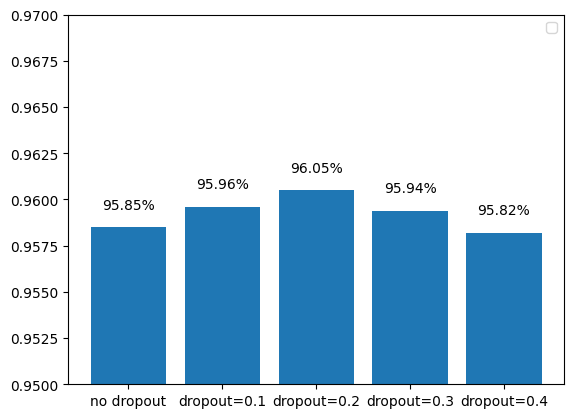

In [ ]:
labels = ["no dropout", "dropout=0.1", "dropout=0.2", "dropout=0.3", "dropout=0.4"]
acc_values = [model.evaluate(x_test, y_test)[1] for model in [dropoutmodel0, dropoutmodel1, dropoutmodel2, dropoutmodel3, dropoutmodel4]]

# 막대 그래프 그리기
plt.bar(range(5), acc_values)

# X축 레이블 설정
plt.xticks(range(5), labels)

# Y축 범위 설정
plt.ylim(0.95, 0.97)

# 막대 상단에 값 표시
for i, v in enumerate(acc_values):
    plt.text(i, v + 0.001, f"{v*100:.2f}%", ha="center", fontsize=10)

plt.legend()
plt.show()

dropout_rate=0.2일 때 가장 좋은 성능이 나왔습니다.

dropout_rate가 0.4일 때를 제외하고는 모두 dropout을 적용하지 않은 것보다 더 좋은 성능이 나왔습니다.

dropout_rate는 보통 0.1에서 0.2정도 작은 값을 적용합니다.

이번엔 LayerNormalization 레이어도 추가해 보겠습니다.

LayerNormalization은 Dense 레이어 중간 중간에 추가해 줍니다.

In [4]:
def LayerNormModel():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.LayerNormalization(),
        layers.Dense(128, activation='relu'),
        layers.LayerNormalization(),
        layers.Dense(64, activation='relu'),
        layers.LayerNormalization(),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])

    # 모델 컴파일
    model.compile(optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

norm_model = LayerNormModel()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
norm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8023 - loss: 0.6513 - val_accuracy: 0.9405 - val_loss: 0.2005
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9385 - loss: 0.2101 - val_accuracy: 0.9502 - val_loss: 0.1605
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9566 - loss: 0.1548 - val_accuracy: 0.9583 - val_loss: 0.1321
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9648 - loss: 0.1227 - val_accuracy: 0.9643 - val_loss: 0.1174
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9705 - loss: 0.1001 - val_accuracy: 0.9667 - val_loss: 0.1042
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9748 - loss: 0.0878 - val_accuracy: 0.9688 - val_loss: 0.0982
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9785 - loss: 0.0748 - val_accuracy: 0.9712 - val_loss: 0.0926
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9812 - loss: 0.0651 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9536 - loss: 0.1558
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1014


<ipython-input-10-7612529dd21a>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


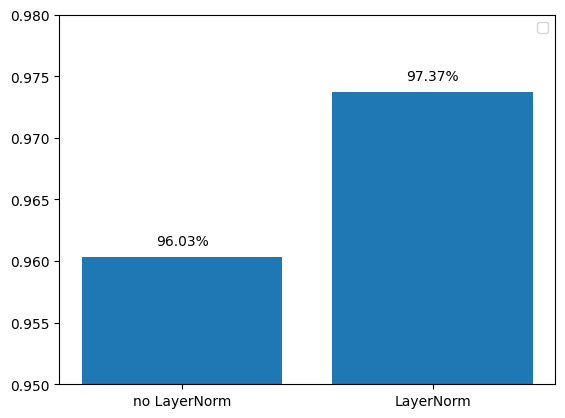

In [ ]:
labels = ["no LayerNorm", "LayerNorm"]
acc_values = [model.evaluate(x_test, y_test)[1] for model in [dropoutmodel2, norm_model]]

# 막대 그래프 그리기
plt.bar(range(2), acc_values)

# X축 레이블 설정
plt.xticks(range(2), labels)

# Y축 범위 설정
plt.ylim(0.95, 0.98)

# 막대 상단에 값 표시
for i, v in enumerate(acc_values):
    plt.text(i, v + 0.001, f"{v*100:.2f}%", ha="center", fontsize=10)

plt.legend()
plt.show()

LayerNormalization()을 적용한 모델과 적용하지 않은 모델의 정확도가 1% 가량 차이 납니다.

LayerNormalization()이 확실히 학습에 긍정적인 효과를 줬네요!

성능이 점점 올라가는 것을 보니 재밌지 않나요?

## Convolution 레이어 사용

지금까지는 이미지를 일자로 쭉 편 뒤(Flatten)에 Dense 레이어를 적용하여 이미지를 처리했습니다.

하지만 그 과정에서 이미지의 원래 모습을 유지하지 못하게 되는 문제가 있습니다. 이러면 모델이 이미지를 온전히 이해하기 힘들 수도 있겠죠?

Convolution 레이어를 사용하면 이미지의 형태를 유지하면서도 더 효율적으로 학습을 수행할 수 있습니다.

Convolution 레이어를 사용해 모델을 개선해 봅시다.

* Conv2D(filters, kernel_size, padding)
  * filters : Convolution 레이어의 필터 수를 나타냅니다.
  * kernel_size : Convolution 레이어의 필터의 크기를 나타냅니다. (kernel_size*kernel_size)
  * padding : 입력되는 이미지의 크기를 늘려주는 역할을 합니다.
    * 'valid' : padding을 수행하지 않고 그대로 convolution 연산을 수행합니다.
    * 'same' : convolution 연산을 수행하고 난 뒤에 같은 크기의 이미지가 출력되도록 padding을 수행합니다.

* MaxPool2D(kernel_size=(2, 2))
  * 입력된 이미지에서 (2, 2) 크기의 필터를 적용해 해당 필터 범위에서 가장 큰 값만 추출합니다.
  * 이는 가장 주요 특징값만을 추출함으로써 연산의 효율을 올려주는 역할을 하게 됩니다.
  * 출력 결과는 원래 이미지 크기의 절반이 됩니다.
    * (ex) (28x28) 이미지에 MaxPool2D()를 적용하면 (14x14) 크기가 됨.)

* GlobalAveragePooling2D()
  * 이미지 형태의 출력 결과에서 평균을 계산해 1차원 벡터로 변환합니다.
  * Dense layer와 연결하기 전에 사용되며, 모델의 파라미터 수를 줄여 과적합을 방지하는 데도 도움을 줍니다.

In [6]:
def ConvModel():
    model = models.Sequential([
        layers.InputLayer((28, 28, 1)),
        layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])

    # 모델 컴파일
    model.compile(optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


conv_model = ConvModel()

In [7]:
conv_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8429 - loss: 0.7404 - val_accuracy: 0.9594 - val_loss: 0.2038
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9669 - loss: 0.1784 - val_accuracy: 0.9774 - val_loss: 0.1111
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9764 - loss: 0.1175 - val_accuracy: 0.9781 - val_loss: 0.1005
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9808 - loss: 0.0912 - val_accuracy: 0.9815 - val_loss: 0.0743
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9850 - loss: 0.0736 - val_accuracy: 0.9844 - val_loss: 0.0617
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9867 - loss: 0.0638 - val_accuracy: 0.9861 - val_loss: 0.0541
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9891 - loss: 0.0542 - val_accuracy: 0.9875 - val_loss: 0.0497
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9903 - loss: 0.0481 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1039
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9849 - loss: 0.0513


<ipython-input-8-99c9038512fc>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


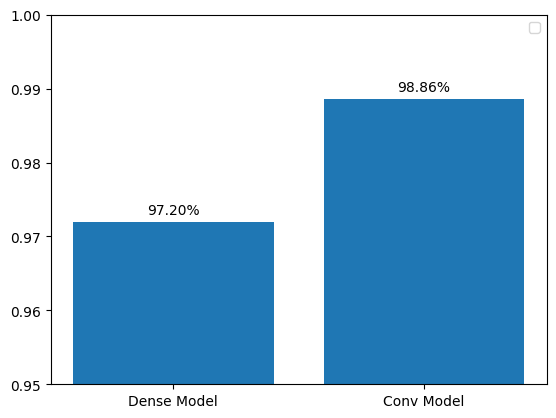

In [8]:
labels = ["Dense Model", "Conv Model"]
acc_values = [model.evaluate(x_test, y_test)[1] for model in [norm_model, conv_model]]

# 막대 그래프 그리기
plt.bar(range(2), acc_values)

# X축 레이블 설정
plt.xticks(range(2), labels)

# Y축 범위 설정
plt.ylim(0.95, 1.0)

# 막대 상단에 값 표시
for i, v in enumerate(acc_values):
    plt.text(i, v + 0.001, f"{v*100:.2f}%", ha="center", fontsize=10)

plt.legend()
plt.show()

정확도가 거의 99%까지 올라왔어요! 😎

이러다 100% 찍는거 아닌가요?